In [1]:
from dvae.SE.speech_enhancement import SpeechEnhancement
import os
import torch
import sys
import soundfile as sf
from IPython.display import Audio
import matplotlib.pyplot as plt

## Test signals

In [2]:
mix_file = './data/x.wav' # noisy speech signal
speech_file = './data/s.wav' # clean speech signal
video_file = './data/v.npy' # video signal

## Define input parameters

In [3]:
verbose = True # show the progress
vae_mode = "A-DKF" # VAE model. Non-dynamical: A-VAE, AV-VAE. Dynamical: A-DKF, AV-DKF.
algo_type = "gdpeem" # SE algorithm. Choose one of {peem, gpeem} for non-dynamical VAE models, and one of {dpeem, gdpeem} for the dynamical versions.

save_flg = False
num_iter = 100 # number of EM iterations
num_E_step = 20 # number of E-step iterations
fs = 16000 # sampling frequency
nmf_rank = 8 # rank of the NMF model for noise
demo = True
compute_scores = True # whether to compute the scores

device = 'cuda' if torch.cuda.is_available() else 'cpu'

if vae_mode == 'A-VAE':
    model_path = './pretrained_models/A-VAE/A-VAE.pt'
    cfg_file = './saved_model/A-VAE/config.ini'

if vae_mode == 'AV-VAE':
    model_path = './pretrained_models/AV-VAE/AV-VAE.pt'
    cfg_file = './saved_model/AV-VAE/config.ini'

if vae_mode == 'A-DKF':
    model_path = './pretrained_models/A-DKF/A-DKF.pt'
    cfg_file = './saved_model/A-DKF/config.ini'

if vae_mode == 'AV-DKF':
    model_path = './pretrained_models/AV-DKF/AV-DKF.pt'
    cfg_file = './saved_model/AV-DKF/config.ini'


root_path, _ = os.path.split(model_path)
_, model_name = os.path.split(root_path)

output_dir = "./results"
if not os.path.isdir(output_dir):
    os.makedirs(output_dir)
    
# SE parameters
se_params = { 'model_path':model_path,
              'device':device,
              'output_dir':output_dir,
              'nmf_rank':nmf_rank,
              'num_iter':num_iter,
              'num_E_step':num_E_step,
              'save_flg':save_flg,
              'verbose':verbose,
              'demo':demo,
              'compute_scores':compute_scores}

## Run the SE algorithm

elapsed time: 14.2258 s
Input scores - SI-SDR: -0.5363244126206246 -- PESQ: 1.1073527336120605 --- STOI: 0.6608448648891887
Output scores - SI-SDR: 5.793591374469536 -- PESQ: 1.3179115056991577 --- STOI: 0.6873902937058602


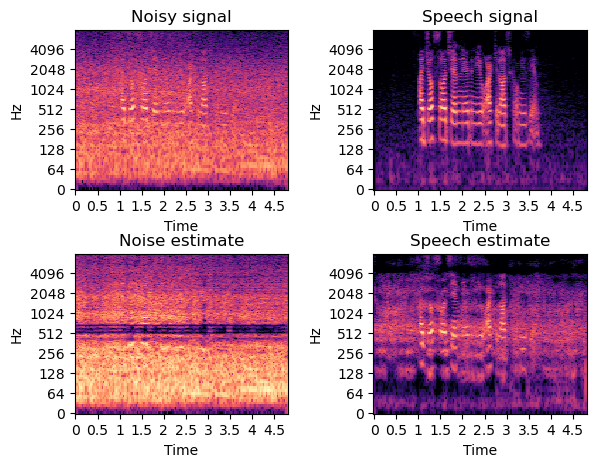

In [4]:
se = SpeechEnhancement(se_params)

# Run SE & evaluations
info = se.run([mix_file, speech_file, video_file, algo_type])

print('Input scores - SI-SDR: {} -- PESQ: {} --- STOI: {}'.format(info['input_scores'][0], info['input_scores'][1], info['input_scores'][2]))
print('Output scores - SI-SDR: {} -- PESQ: {} --- STOI: {}'.format(info['output_scores'][0], info['output_scores'][1], info['output_scores'][2]))

## Play the signals

### Clean speech signal

In [5]:
Audio(data=info["clean_wave"], rate=fs, autoplay=False)

### Input (unprocessed) speech signal

In [6]:
Audio(data=info["noisy_wave"], rate=fs, autoplay=False)

### Enhanced speech signal

In [7]:
Audio(data=info["enh_wave"], rate=fs, autoplay=False)

### Estimated noise signal

In [8]:
Audio(data=info["estnoise_wave"], rate=fs, autoplay=False)